# 5.1 Hafta  | Pandas

## Keşifçi Veri Analizi 

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

df = sns.load_dataset('tips')


In [7]:
df.head(5)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
total_bill    244 non-null float64
tip           244 non-null float64
sex           244 non-null category
smoker        244 non-null category
day           244 non-null category
time          244 non-null category
size          244 non-null int64
dtypes: category(4), float64(2), int64(1)
memory usage: 7.2 KB


Bir lokantanın verilerini barındıran veri çerçevesiyle keşif yapalım.

In [13]:
df.describe().T # sadece sayısal verileri açıklar. 

,count,mean,std,min,25%,50%,75%,max
total_bill,244.0,19.785943,8.902412,3.07,13.3475,17.795,24.1275,50.81
tip,244.0,2.998279,1.383638,1.00,2.0000,2.900,3.5625,10.00
size,244.0,2.569672,0.951100,1.00,2.0000,2.000,3.0000,6.00


In [14]:
df.head() # veri çerçevesinin tüm sütunları ve ilk 5 gözlemini görüntüledik.

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


Görüldüğü üzere veri çerçevesi bir müşterinin veya müşteri grubunun bıraktığı toplam ücreti, bahşişi, hesabı ödeyen kişinin cinsiyetini, sigara içip içmediğini, kaydın hangi gün alındığını ve yemek saatini, yemeğin kaç porsiyon olduğunu bizimle paylaşıyor.

In [15]:
df.tail() # veri çerçevesinin son 5 gözlemini görüntüledik.

,total_bill,tip,sex,smoker,day,time,size
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2
243,18.78,3.00,Female,No,Thur,Dinner,2


In [25]:
df.sample(10) # veri çerçevesinin rastgele 10 gözlemini görüntüleyelim.

,total_bill,tip,sex,smoker,day,time,size
151,13.13,2.00,Male,No,Sun,Dinner,2
2,21.01,3.50,Male,No,Sun,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
224,13.42,1.58,Male,Yes,Fri,Lunch,2
192,28.44,2.56,Male,Yes,Thur,Lunch,2
100,11.35,2.50,Female,Yes,Fri,Dinner,2
108,18.24,3.76,Male,No,Sat,Dinner,2
162,16.21,2.00,Female,No,Sun,Dinner,3
238,35.83,4.67,Female,No,Sat,Dinner,3
51,10.29,2.60,Female,No,Sun,Dinner,2


In [27]:
df.shape  # Bu veri çerçevesinde kaç adet gözlem ve değişken olduğunu yazdıralım.

# satır ve sütun demedim, çünkü bu bir veri çerçevesi, her bir değerin canı var.

(244, 7)

In [30]:
df.isna().sum()  # hiçbir değişkende eksik gözlem yok.

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

In [31]:
df.count()  # her bir değişkende kaç adet değer olduğunu sorguluyoruz.

total_bill    244
tip           244
sex           244
smoker        244
day           244
time          244
size          244
dtype: int64

In [34]:
df["tip"]  # sadece bahşişleri görüntüleyelim.

0      1.01
1      1.66
2      3.50
3      3.31
4      3.61
5      4.71
6      2.00
7      3.12
8      1.96
9      3.23
10     1.71
11     5.00
12     1.57
13     3.00
14     3.02
15     3.92
16     1.67
17     3.71
18     3.50
19     3.35
20     4.08
21     2.75
22     2.23
23     7.58
24     3.18
25     2.34
26     2.00
27     2.00
28     4.30
29     3.00
       ... 
214    6.50
215    1.10
216    3.00
217    1.50
218    1.44
219    3.09
220    2.20
221    3.48
222    1.92
223    3.00
224    1.58
225    2.50
226    2.00
227    3.00
228    2.72
229    2.88
230    2.00
231    3.00
232    3.39
233    1.47
234    3.00
235    1.25
236    1.00
237    1.17
238    4.67
239    5.92
240    2.00
241    2.00
242    1.75
243    3.00
Name: tip, Length: 244, dtype: float64

Acaba kaç adet benzersiz gün değeri var? Tüm haftanın günleri var mı?

In [35]:
df["day"].unique()

[Sun, Sat, Thur, Fri]
Categories (4, object): [Sun, Sat, Thur, Fri]

In [36]:
df["sex"].unique()   # acaba cinsiyet beyannamesinde bulunmayanlar oldu mu? 

[Female, Male]
Categories (2, object): [Female, Male]

In [37]:
df["smoker"].unique()  # sigara içen ve içmeyenden ibaret mi?

[No, Yes]
Categories (2, object): [No, Yes]

In [38]:
df["size"].unique()  # kaç adet benzersiz porsiyon var?

array([2, 3, 4, 1, 6, 5], dtype=int64)

In [39]:
df["size"].nunique()  # sayamayacağımız kadar çok olsaydı kaç benzersiz değer var sorusunu yanıtlamak için nunique() kullanırız.

6

In [40]:
df["time"].unique() # sadece akşam ve öğlen yemekleri olarak ayırmışlar, bu bilgiyi de cebimize koyup devam edelim.

[Dinner, Lunch]
Categories (2, object): [Dinner, Lunch]

Bazı istatistiksel çıkarımlarda bulunalım.

In [41]:
df["total_bill"].mean()  # ödenen hesapların ortalaması

19.785942622950824

In [42]:
df["total_bill"].std()  # ödenen hesapların standart sapması

8.902411954856856

In [43]:
df["tip"].mean()  # bırakılan bahşişlerin ortalaması

2.9982786885245902

In [44]:
df["tip"].median()  # bırakılan bahşişlerin medyan değeri

2.9

In [45]:
df["tip"].std()  # bırakılan bahşişlerin standart sapması

1.3836381890011826

In [46]:
df["size"].describe().T # satılan porsiyonların temel istatistik değerleri

count    244.000000
mean       2.569672
std        0.951100
min        1.000000
25%        2.000000
50%        2.000000
75%        3.000000
max        6.000000
Name: size, dtype: float64

In [48]:
df.groupby(["size"]).mean() # her porsiyon için ödenen miktarlar ve bırakılan bahşişlerin ortalaması

,total_bill,tip
size,,
1,7.242500,1.437500
2,16.448013,2.582308
3,23.277632,3.393158
4,28.613514,4.135405
5,30.068000,4.028000
6,34.830000,5.225000


Kadınların ve erkeklerin ödediği hesap üzerine temel istatistik değerleri.

In [49]:
df.groupby(["sex"]).describe()["total_bill"] 

,count,mean,std,min,25%,50%,75%,max
sex,,,,,,,,
Male,157.0,20.744076,9.246469,7.25,14.00,18.35,24.71,50.81
Female,87.0,18.056897,8.009209,3.07,12.75,16.40,21.52,44.30


Kadınların ve erkeklerin ödediği hesap, bıraktığı bahşiş ve tükettikleri porsiyon değerlerinin ortalamaları.

In [50]:
df.groupby(["sex"]).mean()  # 

,total_bill,tip,size
sex,,,
Male,20.744076,3.089618,2.630573
Female,18.056897,2.833448,2.459770


In [51]:
df["tip"].mode() # en sık tekrar eden bahşiş miktarı 2 usd

0    2.0
dtype: float64

Porsiyonlar için bırakılan bahşiş miktarlarının ortalamaları. Aralarında bir korelasyon var. Pozitif ve güçlü görünüyor..

In [52]:
df.groupby('size')['tip'].apply(lambda x: np.mean(x))

size
1    1.437500
2    2.582308
3    3.393158
4    4.135405
5    4.028000
6    5.225000
Name: tip, dtype: float64

Bu korelasyonun katsayısını görmek isteyelim.

In [55]:
df.corr()["total_bill"]["size"]  # tahmin edildiği gibi, pozitif ve güçlü sayılabilir.

0.5983151309049025

Erkek olan ve 8$'ın üstünde tip bırakan müşterileri listeledik.

In [56]:
df[(df["sex"] == "Male") & (df["tip"] > 8)]

,total_bill,tip,sex,smoker,day,time,size
170,50.81,10.0,Male,Yes,Sat,Dinner,3
212,48.33,9.0,Male,No,Sat,Dinner,4


5$'ın üstünde bahşiş bırakan kadın müşterileri ödedikleri hesaba göre sıraladık.

In [58]:
df[(df['tip']>5) & (df['sex'] == "Female")].sort_values('total_bill', axis = 0, ascending=False)

,total_bill,tip,sex,smoker,day,time,size
85,34.83,5.17,Female,No,Thur,Lunch,4
52,34.81,5.20,Female,No,Sun,Dinner,4
155,29.85,5.14,Female,No,Sun,Dinner,5
214,28.17,6.50,Female,Yes,Sat,Dinner,3


En yüksek bahşiş veren 5 müşterinin hangi gün geldiklerini ve sigara içip içmediklerini gözlemleyelim.

In [60]:
df.sort_values('tip', axis = 0, ascending = False).head()[["tip","day", "smoker"]]

,tip,day,smoker
170,10.00,Sat,Yes
212,9.00,Sat,No
23,7.58,Sat,No
59,6.73,Sat,No
141,6.70,Thur,No


query() kullanarak da aynı sorgulamaları yapabiliriz.

In [62]:
df_filtered = df.query('tip>6 & size<5')[["sex", "tip", "size"]]
df_filtered

,sex,tip,size
23,Male,7.58,4
59,Male,6.73,4
170,Male,10.00,3
183,Male,6.50,4
212,Male,9.00,4
214,Female,6.50,3


# Görselleştirme

Sürekli değerleri çizdirmek için scatterplot kullanılır, dağılım grafiğidir. Burada tip, total_bill sürekli değerlerdir.

In [63]:
sns.set(rc={'figure.figsize':(8,6)})  # grafikleri 8, 6 şeklinde boyutlandırmak için yazdık, yazmasak da olur.

Patron soruyor.

- Müşterilerin verdiği bahşiş miktarı ile ödedikleri hesap miktarı arasındaki ilişkiyi açıklayabilir misin?

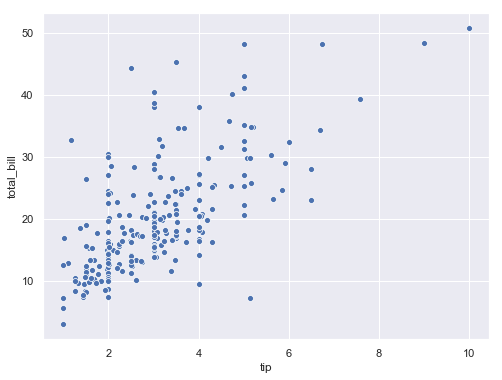

In [64]:
sns.scatterplot(x = "tip", y = "total_bill", data = df);

Özellikle üst üste binen gözlemler okunabilirliği düşürebilir bu yüzden jointplot çizdirilebilir. Jointplot sayesinde gözlemlerin hangi aralıkta ne kadar yoğun olduğunu da gözlemleyebiliriz.

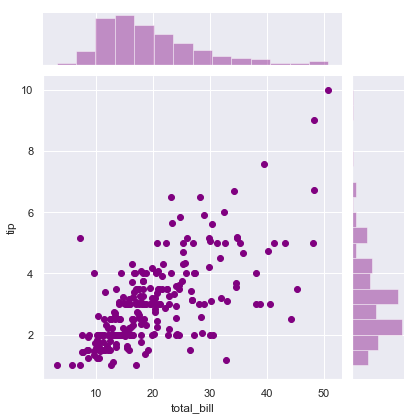

In [65]:
sns.jointplot(x = "total_bill", y = "tip", data = df, color="purple");

Kovaryans matrisi bize; ödenen hesap ile bahşiş arasında pozitif, porsiyon ile bahşiş arasında pozitif ve ödenen hesap ile porsiyon arasında pozitif bir ilişkinin var olduğunu göstermektedir. Ancak ilişkinin şiddeti hakkında bir yorum yapamayız.

In [66]:
df.cov()

,total_bill,tip,size
total_bill,79.252939,8.323502,5.065983
tip,8.323502,1.914455,0.643906
size,5.065983,0.643906,0.904591


Şiddet hakkında yorum yapmak için korelasyon matrisi çizdirelim.

In [67]:
df.corr() 

,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


İnsanlar daha çok porsiyon yediğinde daha fazla hesap ödemiş ve daha fazla tip bırakmış. Yani porsiyon ve ödenen hesap arasında güçlü ve pozitif bir ilişki var. Aynı zamanda bahşiş ve bırakılan tip arasında da pozitif bir korelasyon var.

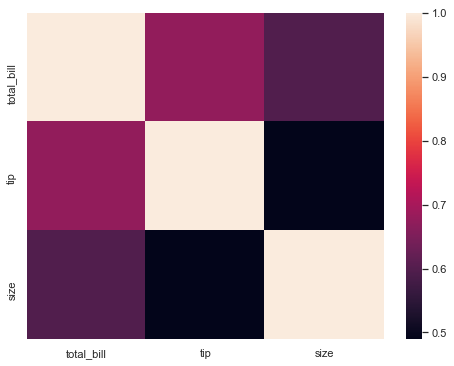

In [69]:
corr = df.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values);

Patron soruyor.

+ Müşterilerin verdiği bahşiş miktarı ile ödedikleri hesap miktarı arasında ilişkiyi cinsiyetleriyle beraber açıklayabilir misin?

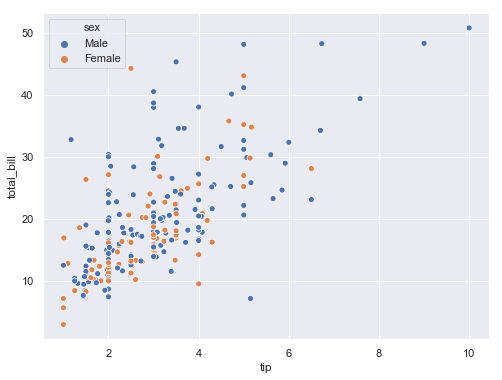

In [71]:
sns.scatterplot(x = "tip", y = "total_bill", hue = "sex",  data = df);

Patron ödenen hesapların dağılımını görmek istiyor. Histogram bu konuda bize yardımcı olacaktır.

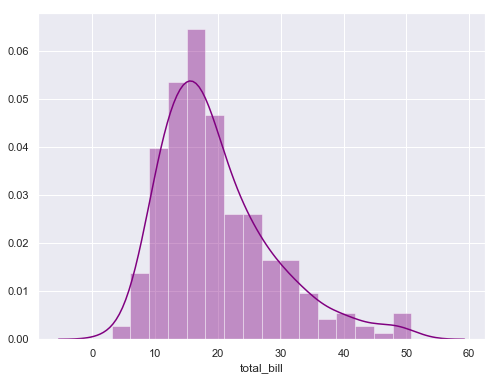

In [72]:
sns.distplot(df["total_bill"], bins=16, color="purple");

Patron bırakılan bahşişlerin dağılımını görmek istiyor.

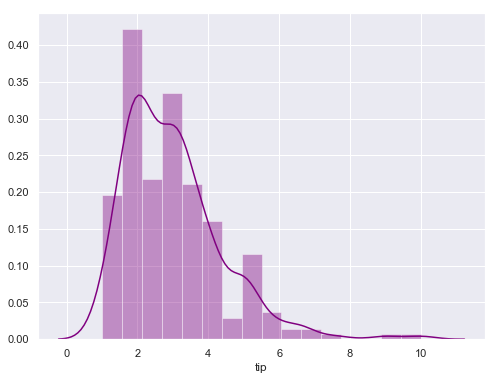

In [73]:
sns.distplot(df["tip"], bins=16, color="purple");

Patron, ödenen hesapların ve bahşişlerin yoğunluğunu daha iyi görmek istiyor.

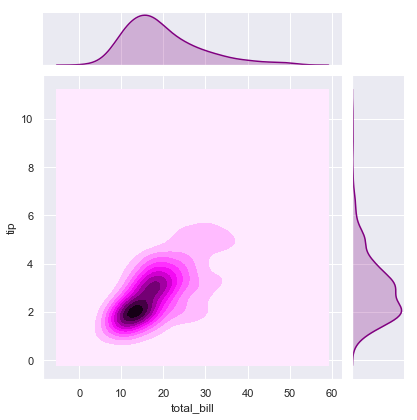

In [74]:
sns.jointplot(x = df["total_bill"], y = df["tip"], kind = "kde", color = "purple");

Patron soruyor.

- Müşterilerin verdiği bahşiş miktarı ile ödedikleri hesap miktarı arasında bir ilişkiyle beraber cinsiyetlerini de belirterek sigara içip içmediklerini de açıklayabilir misin?

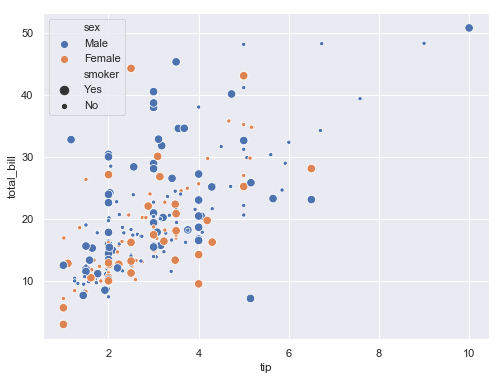

In [75]:
sns.scatterplot(x = "tip", y = "total_bill", hue = "sex", size = "smoker", data = df);

Patron soruyor.

- Müşterilerin verdiği bahşiş miktarı ile ödedikleri hesap miktarı arasında bir ilişkiyle beraber cinsiyetlerini ve sigara içip içmediklerini belirtilmesi üzerine hesabın hangi zaman dilimi içerisinde ödendiğini de açıklar mısın? 

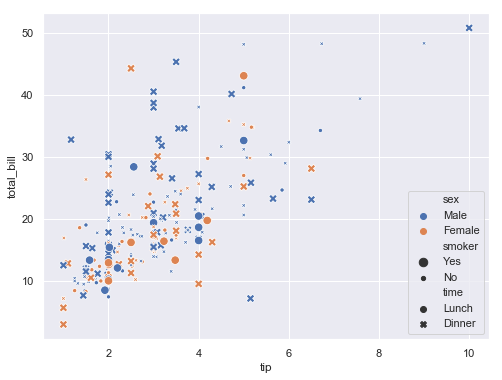

In [76]:
sns.scatterplot(x = "tip", y = "total_bill", hue = "sex", size = "smoker",  style = "time" , data = df);

Patron, hangi cinsiyetin daha bonkör olduğunu öğrenmek için doğrusal bir çizgi çizdirmek istiyor.

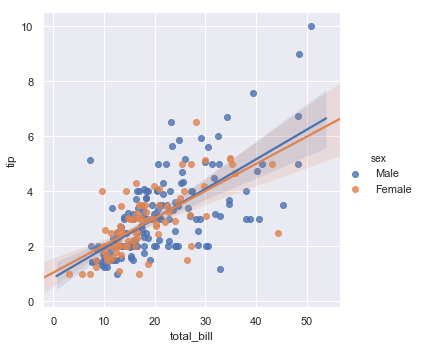

In [77]:
sns.lmplot(x = "total_bill", y = "tip", data = df, hue = "sex");

Violinplot (keman grafiği), scatter plot gibi sürekli veriler için ideal bir görselleştirme tekniği olabilir.

Patron, loktantasında servis edilen porsiyonların dağılımını görmek istiyor.

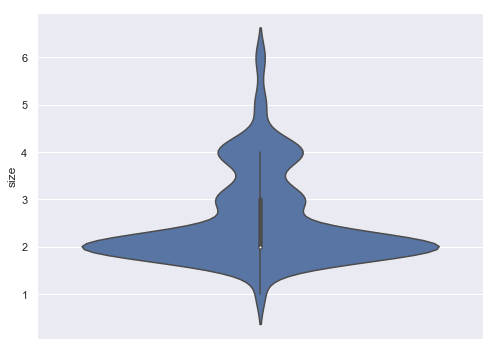

In [78]:
sns.violinplot(y = "size", data = df);

Patron kişilerin sigara içme durumu ile ödedikleri hesap arasında bir ilişki var mı? diye soruyor.

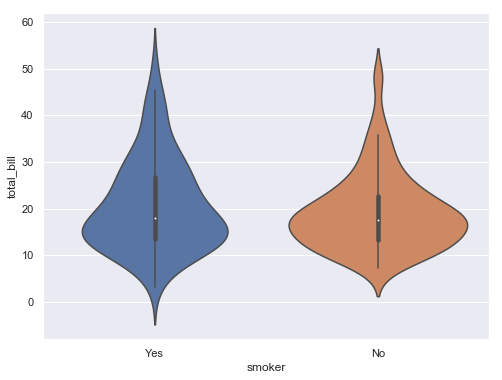

In [79]:
sns.violinplot(x = "smoker", y = "total_bill", data = df);

Patron, sigara içen kişilerin bıraktıkları bahşiş ile içmeyen kişilerin bıraktıkları bahşiş arasında anlamlı bir farklılık var mı? diye soruyor.

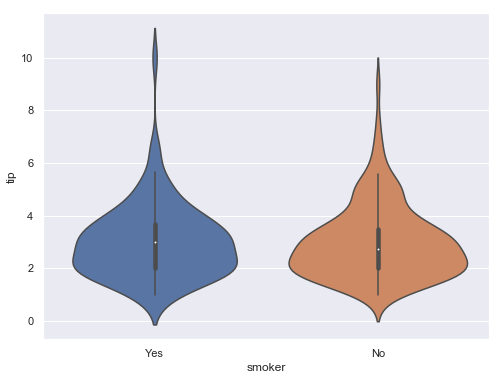

In [80]:
sns.violinplot(x = "smoker", y = "tip", data = df);

Patron, hesap ödeyen müşterilerinin cinsiyetinin lokantası için ayırt edici anlamlı bir nitelik olup olmadığını sorguluyor.

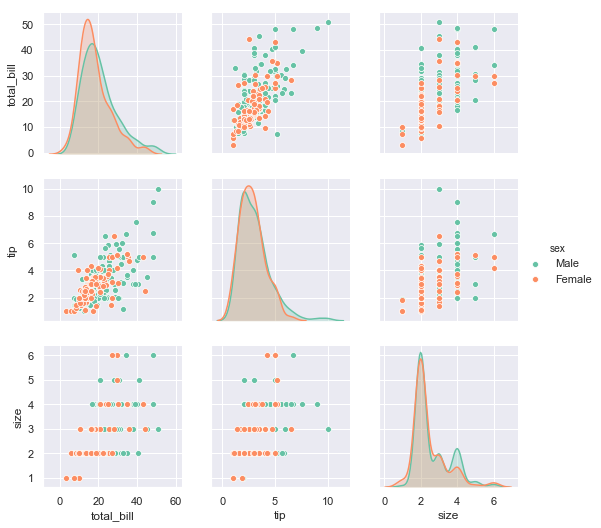

In [81]:
sns.pairplot(df, hue = "sex", palette="Set2");

Patron, erkek ve kadınların ödediği hesap dağılımları arasında nasıl bir fark olduğunu sorguluyor.

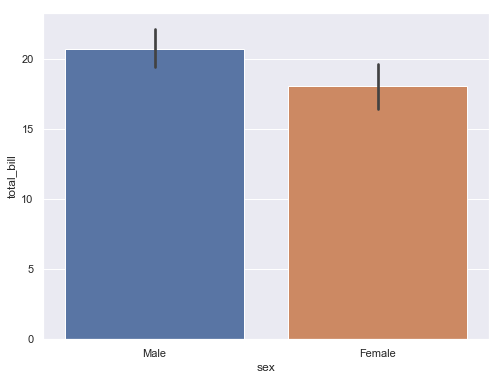

In [82]:
sns.barplot(x ="sex" , y = "total_bill" , data = df);

Patron, hangi günler ödenen hesapların daha yüklü olduğunu sorguluyor.

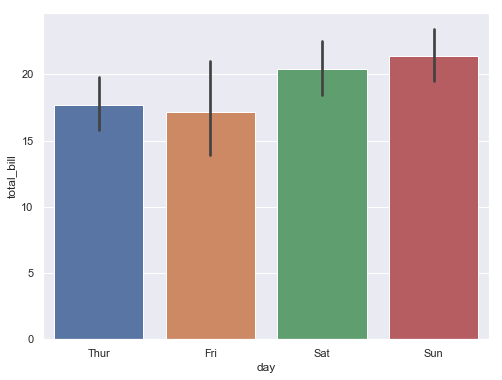

In [83]:
sns.barplot(x = "day", y = "total_bill", data = df);

Patron, cumartesi ve pazar günleri daha yoğun olduğunun çıkarımını yapıyor.

Patron, aşçıyı bilgilendirmek için hangi gün daha fazla porsiyon ve daha az porsiyon yemek çıkarması gerektiğini sorguluyor.

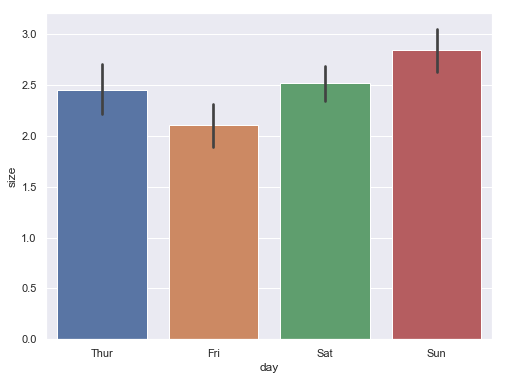

In [84]:
sns.barplot(x = "day", y = "size", data = df);

Patron, garsonlarının hangi günleri daha çok sevdiğini merak ediyor.

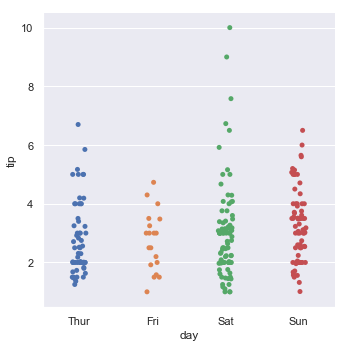

In [85]:
sns.catplot(x = "day", y = "tip", data = df); # hangi günler bahşişler daha yoğun ve yüksek miktardı?

Patron gelen müşterilerin (veya hesap ödeyen müşterilerin) cinsiyetlerinin oranını merak ediyor.

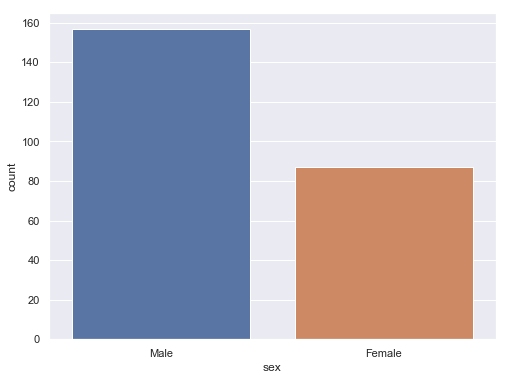

In [86]:
sns.countplot(x = "sex", data = df);

Patron, hesapları ödeyen kasadaki arkadaşın hangi günler daha fazla hesap ödediğini en yorucu gününü tahmin etmek istiyor.

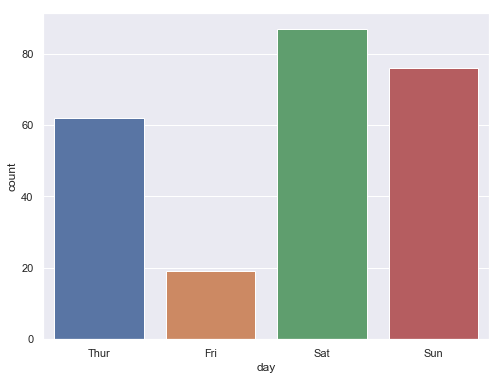

In [87]:
sns.countplot(x = "day", data = df);  # hangi günler daha çok hesap ödenmiş ? 

Patron, akşamları mı yoksa öğlenleri mi daha çok yoğun olduğunu merak ediyor.

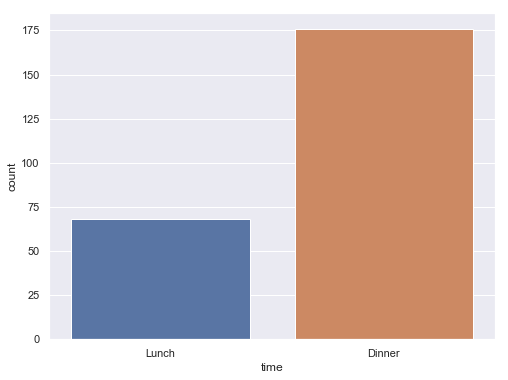

In [88]:
sns.countplot("time", data = df);

Patron, sigara içen ve içmeyen müşterileri özellikle hangi öğün ağırladığını ve bu müşterilerin ödedikleri hesap tutarını merak ediyor.

C:\Users\deniz.kilinc\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


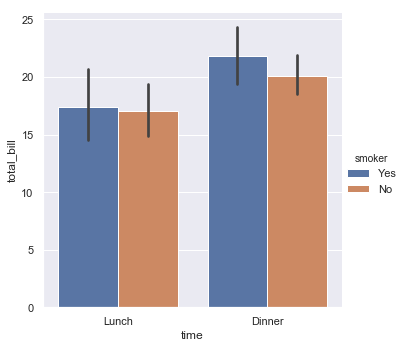

In [89]:
sns.factorplot("time", "total_bill", "smoker", data = df, kind = "bar");